# Assignment 3
write your names here

In [1]:
import numpy as np

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

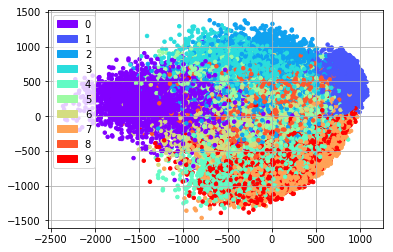

In [3]:
# Insert Code for Subtask 1.1 here

# Additional imports
import imageio
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

# Set number of classes
directory = 'mnist'
num_classes = len(listdir(directory))
digit_prefix=['d%d' % i for i in range(0, num_classes)]
colors = cm.rainbow(np.linspace(0, 1, num_classes))

# Find number of samples in each class
n = np.zeros(num_classes)
for i, dp in enumerate(digit_prefix):
    class_samples = listdir(directory + '/' + dp)
    n[i] = len(class_samples)

N = int(sum(n))        # Total #samples
X = np.zeros((784,N))  # Data matrix
Y = np.zeros(N)        # Label vector
C = np.zeros((N, 4))   # Color vector

# Read data and populate X, Y and C
for i, dp in enumerate(digit_prefix):
    Y[int(sum(n[:i])):int(sum(n[:i+1]))] = i
    C[int(sum(n[:i])):int(sum(n[:i+1])), :] = np.expand_dims(colors[i],axis=0)
    for j in range(int(n[i])):
        X[:, int(sum(n[:i]))+j] = np.float64(imageio.imread('mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())

# Get first k principal components of data
k = 2
S = linear_pca(X, k)

# Randomize order of data for plotting
# (so one class is not entirely covered by another)
idx_new = np.arange(N)
np.random.shuffle(idx_new)

# First 2 principal components
PC1 = S[0, idx_new]
PC2 = S[1, idx_new]

# Plot the first 2 principal components of data
plt.scatter(PC1, PC2, c=C[idx_new, :], s=12)
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, 10)]
plt.legend(handles=legend_patch)
plt.grid()
plt.show()

In [10]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    return S

In [11]:
# Insert Code for Subtask 1.3 here

In [1]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

In [14]:
#Insert Code for Subtask 1.5 here